# Partial PCA for GLIC Ensemble

In [1]:
#XRD Ensemble
#41 4NPQ
#28 4HFI

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

## Partial PCA Plotting

In [4]:
def partial_pca(traj,residue_selection):
    #silce traj
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(traj,41)
    #partial PCA 
    ppca = PCA(n_components=2)
    partial_reduced_cartesian = ppca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    print(traj.n_atoms)
    print(partial_reduced_cartesian.shape)
    print(ppca.explained_variance_ratio_)
    fig = plt.figure()
    plt.scatter(partial_reduced_cartesian[:,0], partial_reduced_cartesian[:,1],c=traj.time,marker='x')
    cbar = plt.colorbar()
    plt.scatter(partial_reduced_cartesian[41,0], partial_reduced_cartesian[41,1],marker='o',c='red')
    plt.scatter(partial_reduced_cartesian[28,0], partial_reduced_cartesian[28,1],marker='o',c='orange')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Partial PCA for ' + residue_selection)
    cbar.set_label('states')
    plt.show()

### whole PCA Plotting

[0.42024136 0.28641237]


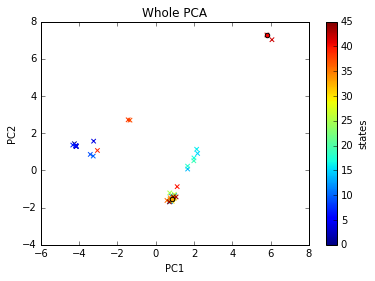

In [5]:
wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
wholetraj.superpose(wholetraj,41)
wholepca = PCA(n_components=2)
#wholepca.fit(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
whole_reduced_cartesian = wholepca.fit_transform(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
print(wholepca.explained_variance_ratio_)
fig = plt.figure()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c=wholetraj.time,marker='x')
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[41,0], whole_reduced_cartesian[41,1],marker='o',c='red')
plt.scatter(whole_reduced_cartesian[28,0], whole_reduced_cartesian[28,1],marker='o',c='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Whole PCA')
cbar.set_label('states')
plt.show()

### Selected Partial PCA plotting

590
(46, 2)
[0.69594916 0.12203368]


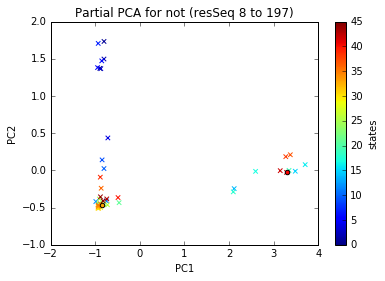

In [6]:
#tmd
partial_pca(wholetraj,"not (resSeq 8 to 197)")

950
(46, 2)
[0.56347091 0.27444251]


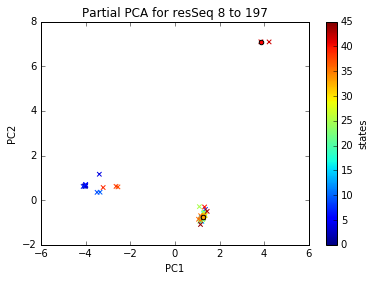

In [7]:
#ecd
partial_pca(wholetraj,"resSeq 8 to 197")

925
(46, 2)
[0.44307464 0.34811625]


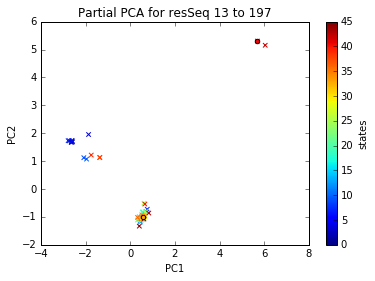

In [8]:
#ecd without res 8 to 12
partial_pca(wholetraj,"resSeq 13 to 197")

120
(46, 2)
[0.87686569 0.08549335]


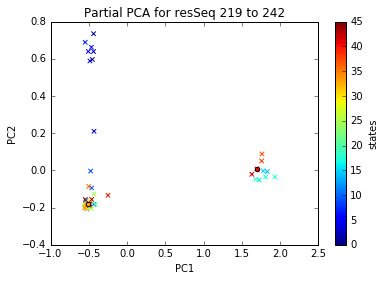

In [9]:
#pore helix
partial_pca(wholetraj,"resSeq 219 to 242")

1515
(46, 2)
[0.38590734 0.26902633]


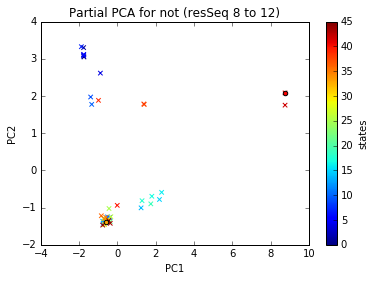

In [10]:
#without res 8 to 12
partial_pca(wholetraj,"not (resSeq 8 to 12)")

### Approach: find the best PCA

In [11]:
def find_best_partial_pca_start(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        residue_selection = 'resSeq 8 to ' + str(i)
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        traj_slice.superpose(traj_slice,41)

        ppca = PCA(n_components=2)
        partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [12]:
def find_best_partial_pca_end(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        residue_selection = 'resSeq ' + str(i) + ' to 315'
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        traj_slice.superpose(traj_slice,41)
        ppca = PCA(n_components=2)
        partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [13]:
def find_best_partial_pca_3D(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        for j in range (0,316-i):
        #residue_selection = 'resSeq 8 to ' + str(i)
            residue_selection = 'resSeq ' + str(i) + ' to ' + str(i + j)
            traj_slice = traj.atom_slice(topology.select(residue_selection))
            traj_slice.superpose(traj_slice,41)

            ppca = PCA(n_components=1)
            partial_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
            pc1.append([i,j,ppca.explained_variance_ratio_[0]])
    return np.asarray(pc1)

In [14]:
pc_start = find_best_partial_pca_start(wholetraj)

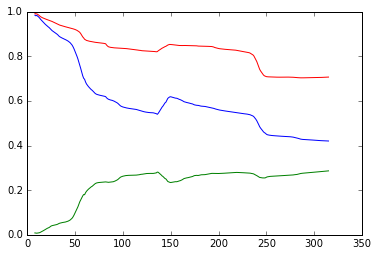

In [15]:
fig = plt.figure()
plt.plot(pc_start[:, 0],pc_start[:, 1])
plt.plot(pc_start[:, 0],pc_start[:, 2])
plt.plot(pc_start[:, 0],pc_start[:, 1] + pc_start[:, 2])

In [16]:
pc_end = find_best_partial_pca_end(wholetraj)

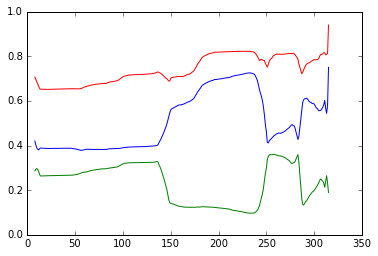

In [17]:
fig = plt.figure()
plt.plot(pc_end[:, 0],pc_end[:, 1])
plt.plot(pc_end[:, 0],pc_end[:, 2])
plt.plot(pc_end[:, 0],pc_end[:, 1] + pc_end[:, 2])

In [17]:
pc_3D = np.loadtxt("ppca.csv",delimiter=",")

<IPython.core.display.Javascript object>


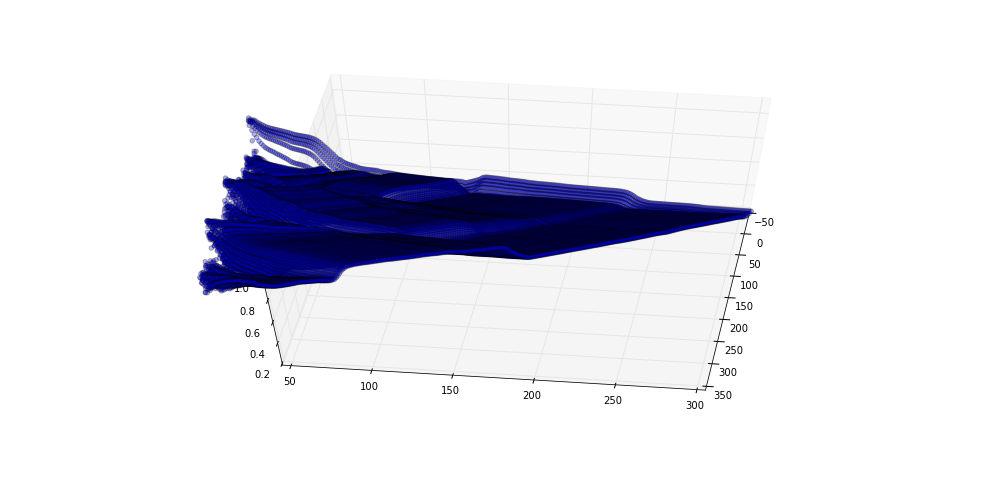

(50, 300)

In [162]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_3D[:,0],pc_3D[:,1],pc_3D[:,2],alpha=0.3)
ax.set_ylim(50,300)

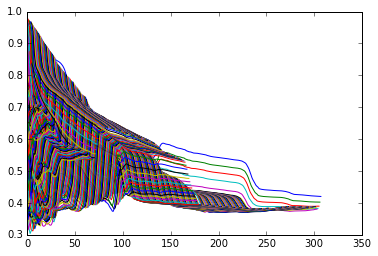

In [20]:
fig = plt.figure()
pc_3D_0_update = 0
i=0
j=308
for i in range(0,47586):
    while pc_3D[i,0] != pc_3D_0_update:
        plt.plot(pc_3D[i : i + j , 1],pc_3D[i : i + j , 2])
        j = j - 1
        pc_3D_0_update = pc_3D[i,0]

### Projection of MD on Partial PCA

In [21]:
def ppca_reduced_cartesian(residue_selection):
    wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
    wholetraj.superpose(wholetraj,41)
    topology = wholetraj.topology
    wholetraj_sliced = wholetraj.atom_slice(topology.select(residue_selection))
    wholetraj_sliced.superpose(wholetraj_sliced,41)
    ppca = PCA(n_components=2)
    partial_reduced_cartesian = ppca.fit_transform(wholetraj_sliced.xyz.reshape(wholetraj_sliced.n_frames, wholetraj_sliced.n_atoms * 3))
    return partial_reduced_cartesian, wholetraj_sliced, ppca

In [22]:
def projection_on_ppca(md_rep, molecule,residue_selection):
    partial_reduced_cartesian, wholetraj_sliced, ppca = ppca_reduced_cartesian(residue_selection)
    if md_rep == '1':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.ca.gro'
        superpose_num = 41
    elif md_rep == '4HFI':
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.skip1.ca.xtc' 
        top_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.ca.gro' 
        superpose_num = 28
    else:
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.ca.gro'
        superpose_num = 41
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection + "and not resSeq 5 to 7"))
    traj.superpose(wholetraj_sliced,superpose_num)
    reduced_cartesian = ppca.transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    fig = plt.figure()
    plt.scatter(reduced_cartesian[:,0],reduced_cartesian[:,1],c=traj.time,alpha=0.1)
    cbar = plt.colorbar()
    avg_md_cartesian = np.mean(reduced_cartesian[:, :], axis=0)
    plt.scatter(avg_md_cartesian[0],avg_md_cartesian[1],marker='o',c='black')
    plt.scatter(partial_reduced_cartesian[:,0], partial_reduced_cartesian[:,1],c='black',marker='^')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('MD_' + md_rep + '  ' + molecule + ' Projection on Partial PCA with selection: ' + residue_selection)
    cbar.set_label('time')
    plt.show()

In [23]:
residue_selection = "(resSeq 12 to 140)"

645
(46, 2)
[0.44124665 0.33583792]


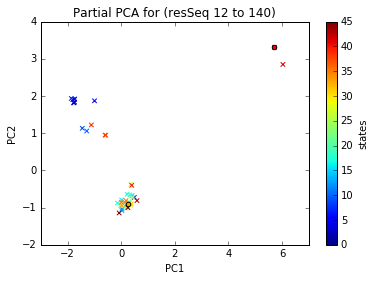

In [24]:
partial_pca(wholetraj,residue_selection)

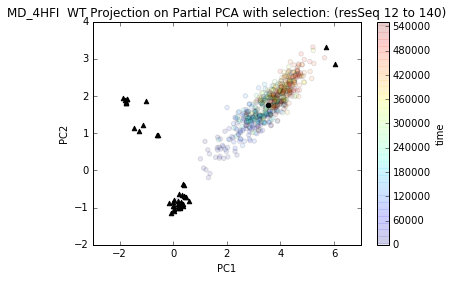

In [25]:
projection_on_ppca("4HFI","WT",residue_selection)

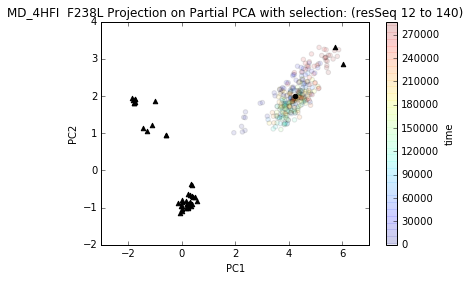

In [26]:
projection_on_ppca("4HFI","F238L",residue_selection)

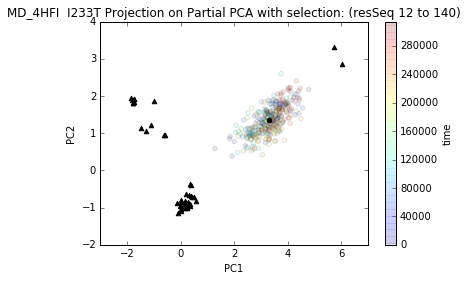

In [27]:
projection_on_ppca("4HFI","I233T",residue_selection)

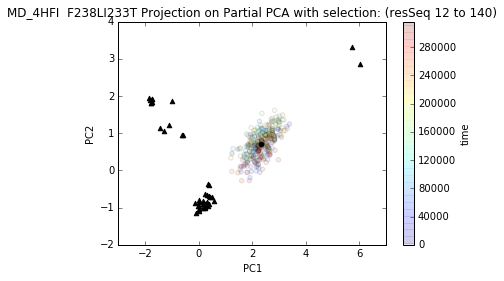

In [28]:
projection_on_ppca("4HFI","F238LI233T",residue_selection)

## Combined Partial PCA

In [29]:
#combine ECD PC1 and TMD PC1
def combined_ppca_reduced_cartesian():
    wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
    wholetraj.superpose(wholetraj,41)
    topology = wholetraj.topology
    wholetraj_sliced_ecd = wholetraj.atom_slice(topology.select("resSeq 8 to 197"))
    wholetraj_sliced_ecd.superpose(wholetraj_sliced_ecd,41)
    wholetraj_sliced_tmd = wholetraj.atom_slice(topology.select("not (resSeq 8 to 197)"))
    wholetraj_sliced_tmd.superpose(wholetraj_sliced_tmd,41)
    ppca_ecd = PCA(n_components=1)
    ppca_tmd = PCA(n_components=1)
    partial_reduced_cartesian = [ppca_ecd.fit_transform(wholetraj_sliced_ecd.xyz.reshape(wholetraj_sliced_ecd.n_frames, wholetraj_sliced_ecd.n_atoms * 3)), ppca_tmd.fit_transform(wholetraj_sliced_tmd.xyz.reshape(wholetraj_sliced_tmd.n_frames, wholetraj_sliced_tmd.n_atoms * 3))]    
    #fig = plt.figure()
    #plt.scatter(partial_reduced_cartesian[0], partial_reduced_cartesian[1],c=wholetraj.time,marker='x')
    #cbar = plt.colorbar()
    #plt.scatter(partial_reduced_cartesian[0][41], partial_reduced_cartesian[1][41],marker='o',c='red')
    #plt.scatter(partial_reduced_cartesian[0][28], partial_reduced_cartesian[1][28],marker='o',c='orange')

    #plt.xlabel('PC1 for ECD')
    #plt.ylabel('PC1 for TMD')
    #plt.title('Combined partial PCA GLIC')
    #cbar.set_label('states')
    #plt.show()
    return partial_reduced_cartesian, wholetraj_sliced_ecd, wholetraj_sliced_tmd,ppca_ecd,ppca_tmd

In [30]:
def projection_on_combined_ppca(md_rep, molecule):
    partial_reduced_cartesian, wholetraj_sliced_ecd,wholetraj_sliced_tmd, ppca_ecd,ppca_tmd = combined_ppca_reduced_cartesian()
    if md_rep == '1':
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md.ca.gro'
        superpose_num = 41
    elif md_rep == '4HFI':
        location = '/media/scottzhuang/data/MD/4HFI_ph46_md1/'
        traj_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.skip1.ca.xtc' 
        top_location = location + molecule + '/mdrun/4HFI_ph46_' + molecule + '_md.ca.gro' 
        superpose_num = 28
    else:
        traj_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.skip100.ca.xtc'
        top_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md' + md_rep + '/' + molecule + '/4NPQ_' + molecule + '_md' + md_rep + '.ca.gro'
        superpose_num = 41
    traj = md.load(traj_location,top=top_location)
    topology = traj.topology
    traj_sliced_ecd = traj.atom_slice(topology.select("resSeq 8 to 197" + "and not resSeq 5 to 7"))
    traj_sliced_tmd = traj.atom_slice(topology.select("not resSeq 8 to 197" + "and not resSeq 5 to 7"))

    traj_sliced_ecd.superpose(wholetraj_sliced_ecd,superpose_num)
    traj_sliced_tmd.superpose(wholetraj_sliced_tmd,superpose_num)

    reduced_cartesian_ecd = ppca_ecd.transform(traj_sliced_ecd.xyz.reshape(traj_sliced_ecd.n_frames, traj_sliced_ecd.n_atoms * 3))
    reduced_cartesian_tmd = ppca_tmd.transform(traj_sliced_tmd.xyz.reshape(traj_sliced_tmd.n_frames, traj_sliced_tmd.n_atoms * 3))

    fig = plt.figure()
    plt.scatter(reduced_cartesian_ecd,reduced_cartesian_tmd,c=traj.time,alpha=0.1)
    cbar = plt.colorbar()
    plt.scatter(partial_reduced_cartesian[0], partial_reduced_cartesian[1],c='black',marker='^')
    plt.xlabel('PC1 ECD')
    plt.ylabel('PC1 TMD')
    plt.title('MD_' + md_rep + '  ' + molecule + ' Projection on Combined Partial PCA')
    cbar.set_label('time')
    plt.show()

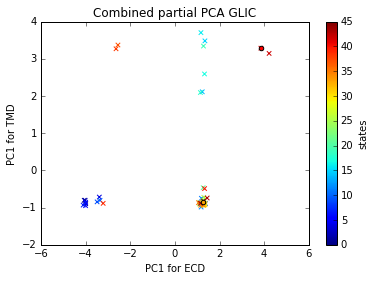

In [31]:
combined_partial_reduced_cartesian,_,_,_,_ = combined_ppca_reduced_cartesian()
fig = plt.figure()
plt.scatter(combined_partial_reduced_cartesian[0], combined_partial_reduced_cartesian[1],c=wholetraj.time,marker='x')
cbar = plt.colorbar()
plt.scatter(combined_partial_reduced_cartesian[0][41], combined_partial_reduced_cartesian[1][41],marker='o',c='red')
plt.scatter(combined_partial_reduced_cartesian[0][28], combined_partial_reduced_cartesian[1][28],marker='o',c='orange')

plt.xlabel('PC1 for ECD')
plt.ylabel('PC1 for TMD')
plt.title('Combined partial PCA GLIC')
cbar.set_label('states')
plt.show()

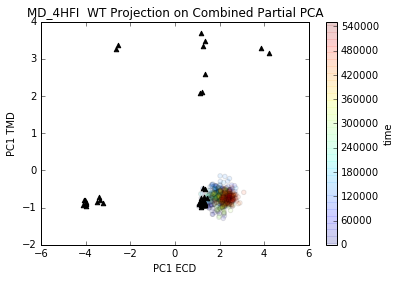

In [32]:
projection_on_combined_ppca("4HFI","WT")

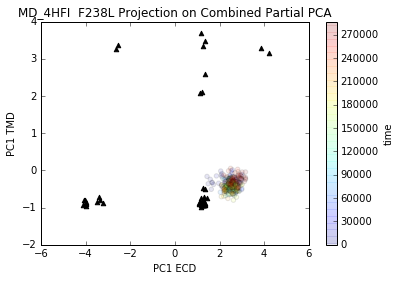

In [33]:
projection_on_combined_ppca("4HFI","F238L")

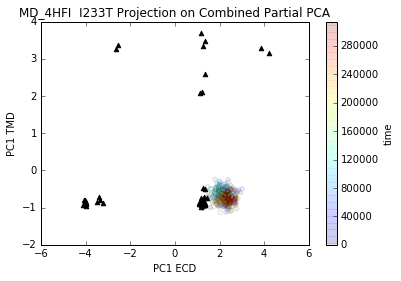

In [34]:
projection_on_combined_ppca("4HFI","I233T")

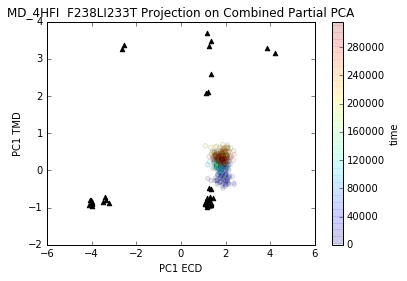

In [35]:
projection_on_combined_ppca("4HFI","F238LI233T")

Plotting one PC1-ECD/PC1-TMD 